<a href="https://colab.research.google.com/github/Wezz-git/AI-samples/blob/main/(CNN)_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Business Problem:

You're a data scientist at a tech company building an automatic photo-tagging service. Your first task is to build a model that can look at an image and tell you if it's a "Cat" or a "Dog".

This is Computer Vision (CV). We are teaching a computer to find patterns in pixels.

The Model:

Build a Convolutional Neural Network (CNN). This is a special, powerful type of neural network designed specifically to analyze images. It learns by finding simple patterns (like edges and corners) and combining them into complex patterns (like "eye," "fur," and "snout").

In [2]:
# Core ML & Data Libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Data sourcing
# This will download the dataset
import tensorflow_datasets as tfds

Load & Prepare the Data:

1 - Resize: Make all images the same size (e..g, 150x150 pixels).

2 - Normalize: Convert all pixel values (which are 0-255) to be between 0 and 1 (which neural networks prefer).

In [3]:
# 1 - Define Image size
Image_size = 150

# 2 - Create a formatting function
# This will be the 'pre' function
def format_image(image, label):
  # Resize the image to our standard size
  image = tf.image.resize(image, (Image_size, Image_size))
  # Normalize the pixel values (0-255) to be (0-1)
  image = image / 255.0
  return image, label

# 3 - Download and prep the data
print("Downloading 'cats_vs_dogs' dataset...")

# 'with_info=true - gets the metadata
# 'as_supervised=True - loands it as (image, label) pairs
(train_ds, validation_ds, test_ds), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

# 4 - apply formatting function to all images
print("Applying formatting (resizing/normalizing) to all images..")
batch_size = 32
train_batches = train_ds.map(format_image).batch(batch_size)
validation_batches = validation_ds.map(format_image).batch(batch_size)
test_batches = test_ds.map(format_image).batch(batch_size)

print("data is loaded and preprocessed")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.E7VXI5_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Applying formatting (resizing/normalizing) to all images..
data is loaded and preprocessed


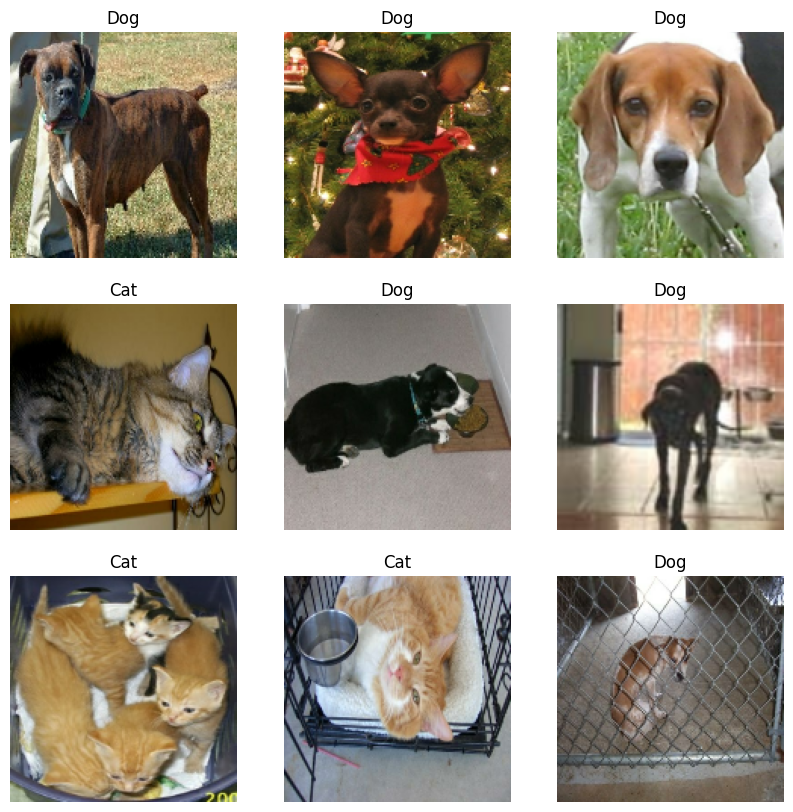

In [4]:
import matplotlib.pyplot as plt

# Get one batch of images
for images, labels in train_batches.take(1):
  pass # this just gets the first batch

# Define the text labels
class_names = ['Cat', 'Dog']

# Plot the first 9 images
plt.figure(figsize=(10, 10))
for i in range (9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i])
  plt.title(class_names[labels[i]])
  plt.axis('off')

plt.show()

Building the Convolutional Neural Network (CNN).

In [5]:
# 1 - define image size
# must match the size of the previous tep
Image_size = 150

print("building the CNN model")

# Build the model
model = Sequential([
    # Layer 1 -  the 'eye' (convolutional layer)
    # Layer scans for basic patterns (edges, corners)
    # imput_shape is (height, width, color_channels)
    Conv2D(32, (3, 3), activation='relu', input_shape=(Image_size, Image_size, 3)),

    # Layer 2 - the 'summarizer' (pooling layer)
    # shrinks the image, keeping on the most important info
    MaxPooling2D((2, 2)),

    # Layer 3 & 4 - repeat to find more complex patterns
    # Layer finds patterns (fur, eyes) built from the first layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Layer 5 & 6 - one mroe time for even more complexity
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Layer 7 - the 'flattener'
    # converts the final 2D image map into a single 1D list
    Flatten(),

    # Layer 8 - 'decision' layer
    # A standard neural network layer that learns from the patterns
    Dense(512, activation='relu'),
    Dropout(0.5),               # Dropout prevents overfitting

    # Layer 9 - The 'Output' layer
    # one neuron that outputs 0 (cat) or 1 (dog)
    Dense(1, activation='sigmoid')
])

# 3 - 'compile' the model
# gives the model its instructions
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4 - print the model
# shows you the blueprint of the moidel you just built
model.summary()

building the CNN model


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Train & Evaluate the CNN

In [6]:
from IPython.core import history
import tensorflow as tf

# 1 - train the model
# Train it for 10 epochs (cycles through the data)
epochs = 20

print("training the CNN model..")
history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=validation_batches        # test it on the validation set after each epoch
)

print("training complete")

# 2 - evaluate the model
# test the model on the 'test_batches' it has never sen

print("\nEvaluating model on the test set..")
loss, accuracy = model.evaluate(test_batches)

print(f"n-- Final model performance --")
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy * 100:.2f}%")

training the CNN model..
Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.5877 - loss: 0.6715 - val_accuracy: 0.6960 - val_loss: 0.5820
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.7583 - loss: 0.5069 - val_accuracy: 0.7743 - val_loss: 0.4691
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.8039 - loss: 0.4243 - val_accuracy: 0.7614 - val_loss: 0.4849
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.8469 - loss: 0.3516 - val_accuracy: 0.7846 - val_loss: 0.4818
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.8829 - loss: 0.2803 - val_accuracy: 0.8190 - val_loss: 0.4801
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.9181 - loss: 0.2070 - val_accuracy: 0.7941 - val_loss: 0.5983
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.9370 - loss: 0.1656 - val_accuracy: 0.8027 - val_loss: 0.6474
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy:

Test accuracy = 82%

The model "train" for 10 epochs. The val_accuracy (validation accuracy) will climb, likely settling around 80-85%.

This final Test Accuracy is your answer. It's the score that proves you've successfully built a Convolutional Neural Network that can look at an image and correctly classify it.